# L&T Vehicle Loan Default Prediction

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Loading dataset
train_original = pd.read_csv("L&T Vehicle Default Prediction Data/train.csv")
test_original = pd.read_csv("L&T Vehicle Default Prediction Data/test.csv")

## Data Exploration

In [3]:
# Data preview
train_original.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [4]:
# Data info
train_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Date.of.Birth                        233154 non-null  object 
 9   Employment.Type                      225493 non-null  object 
 10  DisbursalDate                        233154 non-null  object 
 11  State_ID     

In [5]:
# Data description
train_original.describe()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,...,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,...,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,...,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,...,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,...,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,671084.000000,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,...,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000


In [6]:
# Data description of object columns
train_original.describe(include=['O'])

,Date.of.Birth,Employment.Type,DisbursalDate,PERFORM_CNS.SCORE.DESCRIPTION,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH
count,233154,225493,233154,233154,233154,233154
unique,15433,2,84,20,192,294
top,01-01-88,Self employed,31-10-18,No Bureau History Available,0yrs 0mon,0yrs 0mon
freq,2173,127635,8826,116950,119373,119127


In [7]:
# Data shape
print("Train data shape:",train_original.shape)
print("Test data shape:",test_original.shape)

Train data shape: (233154, 41)
Test data shape: (112392, 40)


## Data Imputation

In [8]:
# Checking for missing values in training and testing set (percentage)
pd.DataFrame(dict(training_set=train_original.isna().sum()*100/train_original.shape[0],
                 testing_set=test_original.isna().sum()*100/test_original.shape[0]))

,training_set,testing_set
AVERAGE.ACCT.AGE,0.000000,0.000000
Aadhar_flag,0.000000,0.000000
CREDIT.HISTORY.LENGTH,0.000000,0.000000
Current_pincode_ID,0.000000,0.000000
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,0.000000,0.000000
Date.of.Birth,0.000000,0.000000
DisbursalDate,0.000000,0.000000
Driving_flag,0.000000,0.000000
Employee_code_ID,0.000000,0.000000
Employment.Type,3.285811,3.063385


Here we can see that column 'Employment.Type' has nearly 3% of missing data, so to deal with this we can either remove the entire record corresponding to missing values or perform data imputation. Removing the complete record results in loss of useful information therefore performing data imputation. Since 'Employment.Type' is a categorical column, doing mode imputation.

In [9]:
# Mode imputation
train_original = train_original.fillna(train_original.mode().iloc[0])
test_original = test_original.fillna(test_original.mode().iloc[0])

In [10]:
# Checking for missing values in training and testing set (percentage)
pd.DataFrame(dict(training_set=train_original.isna().sum()*100/train_original.shape[0],
                 testing_set=test_original.isna().sum()*100/test_original.shape[0]))

,training_set,testing_set
AVERAGE.ACCT.AGE,0.0,0.0
Aadhar_flag,0.0,0.0
CREDIT.HISTORY.LENGTH,0.0,0.0
Current_pincode_ID,0.0,0.0
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,0.0,0.0
Date.of.Birth,0.0,0.0
DisbursalDate,0.0,0.0
Driving_flag,0.0,0.0
Employee_code_ID,0.0,0.0
Employment.Type,0.0,0.0


## Data Preprocessing

In [11]:
# No of unique values and datatypes
pd.DataFrame(dict(no_unique = train_original.nunique(), dtype = train_original.dtypes))

,no_unique,dtype
UniqueID,233154,int64
disbursed_amount,24565,int64
asset_cost,46252,int64
ltv,6579,float64
branch_id,82,int64
supplier_id,2953,int64
manufacturer_id,11,int64
Current_pincode_ID,6698,int64
Date.of.Birth,15433,object
Employment.Type,2,object


In [12]:
# Categorical columns
cat_cols = train_original.select_dtypes('object').columns
train_original[cat_cols].head()

,Date.of.Birth,Employment.Type,DisbursalDate,PERFORM_CNS.SCORE.DESCRIPTION,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH
0,01-01-84,Salaried,03-08-18,No Bureau History Available,0yrs 0mon,0yrs 0mon
1,31-07-85,Self employed,26-09-18,I-Medium Risk,1yrs 11mon,1yrs 11mon
2,24-08-85,Self employed,01-08-18,No Bureau History Available,0yrs 0mon,0yrs 0mon
3,30-12-93,Self employed,26-10-18,L-Very High Risk,0yrs 8mon,1yrs 3mon
4,09-12-77,Self employed,26-09-18,No Bureau History Available,0yrs 0mon,0yrs 0mon


Here we can see that:<br>
<li> Column 'MobileNo_Avl_Flag' has only one unique value so it will not provide any information hence we can safely remove it.
<li> Columns 'Date.of.Birth', 'DisbursalDate', 'AVERAGE.ACCT.AGE' and 'CREDIT.HISTORY.LENGTH' are related to date or duration, so we have to encode it in such a way that can be used in our model.
<li> Columns 'Employment.Type' and 'PERFORM_CNS.SCORE.DESCRIPTION' are categorical so we have to label encode it.

In [13]:
# Removing 'MobileNo_Avl_Flag'
train_clean = train_original.drop('MobileNo_Avl_Flag',axis=1)
test_clean = test_original.drop('MobileNo_Avl_Flag',axis=1)

In [14]:
# Helper function to parse dates to duration
def parse_date(data_frame,old_col,new_col):
    now = pd.Timestamp('now')
    data_frame[old_col] = pd.to_datetime(data_frame[old_col], format='%d-%m-%y')
    data_frame[old_col] = data_frame[old_col].where(data_frame[old_col] < now, data_frame[old_col] -  np.timedelta64(100, 'Y'))
    data_frame[new_col] = (now - data_frame[old_col]).astype('<m8[Y]')
    data_frame=data_frame.drop(old_col,axis=1)

In [15]:
# Converting 'Date.of.Birth' to 'Age' and 'DisbursalDate' to 'DisbursementPeriod'
parse_date(train_clean,'Date.of.Birth','Age')
parse_date(test_clean,'Date.of.Birth','Age')
parse_date(train_clean,'DisbursalDate','DisbursementPeriod')
parse_date(test_clean,'DisbursalDate','DisbursementPeriod')

In [16]:
# Droping the original 'Date.of.Birth' and 'DisbursalDate' columns
train_clean.drop(['Date.of.Birth','DisbursalDate'],axis=1,inplace=True)
test_clean.drop(['Date.of.Birth','DisbursalDate'],axis=1,inplace=True)

In [17]:
train_clean.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employment.Type,State_ID,...,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Age,DisbursementPeriod
0,420825,50578,58400,89.55,67,22807,45,1441,Salaried,6,...,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,37.0,2.0
1,537409,47145,65550,73.23,67,22807,45,1502,Self employed,6,...,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1,35.0,2.0
2,417566,53278,61360,89.63,67,22807,45,1497,Self employed,6,...,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,35.0,2.0
3,624493,57513,66113,88.48,67,22807,45,1501,Self employed,6,...,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1,27.0,2.0
4,539055,52378,60300,88.39,67,22807,45,1495,Self employed,6,...,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1,43.0,2.0


Next we will encode 'PERFORM_CNS.SCORE.DESCRIPTION' column, this will be done in following steps:<br>
<li> Replace every value related to no score to 'A-No score'.
<li> Split every value at '-' and take the second part, so 'A-No score' will become 'No score' and similar for others.    
<li> Get the dummies of the column.<br>
Above steps will be followed for both testing and training data.    

In [18]:
train_clean['PERFORM_CNS.SCORE.DESCRIPTION'].unique()

array(['No Bureau History Available', 'I-Medium Risk', 'L-Very High Risk',
       'A-Very Low Risk',
       'Not Scored: Not Enough Info available on the customer',
       'D-Very Low Risk', 'M-Very High Risk', 'B-Very Low Risk',
       'C-Very Low Risk', 'E-Low Risk', 'H-Medium Risk', 'F-Low Risk',
       'K-High Risk',
       'Not Scored: No Activity seen on the customer (Inactive)',
       'Not Scored: Sufficient History Not Available',
       'Not Scored: No Updates available in last 36 months', 'G-Low Risk',
       'J-High Risk', 'Not Scored: Only a Guarantor',
       'Not Scored: More than 50 active Accounts found'], dtype=object)

In [19]:
# Step 1 - Replace no score related columns to 'A-No score'.
no_score_cols = ['Not Scored: More than 50 active Accounts found',
              'No Bureau History Available',
              'Not Scored: No Activity seen on the customer (Inactive)',
              'Not Scored: No Updates available in last 36 months',
              'Not Enough Info available on the customer',
              'Not Scored: Only a Guarantor',
              'Not Scored: Sufficient History Not Available',
              'Not Scored: Not Enough Info available on the customer']
train_clean['PERFORM_CNS.SCORE.DESCRIPTION'].replace(to_replace=no_score_cols,value= 'A-No score',inplace=True)
test_clean['PERFORM_CNS.SCORE.DESCRIPTION'].replace(to_replace=no_score_cols,value= 'A-No score',inplace=True)

In [20]:
# Step 2 - Split every value at '-' and take the second part.
train_clean['PERFORM_CNS.SCORE.DESCRIPTION'] = train_clean['PERFORM_CNS.SCORE.DESCRIPTION'].apply(
    lambda x:x.split('-')[1])
test_clean['PERFORM_CNS.SCORE.DESCRIPTION'] = test_clean['PERFORM_CNS.SCORE.DESCRIPTION'].apply(
    lambda x:x.split('-')[1])

In [21]:
# Step 3 - Get the dummies
train_clean=pd.get_dummies(train_clean,columns=['PERFORM_CNS.SCORE.DESCRIPTION'],drop_first=True)
test_clean=pd.get_dummies(test_clean,columns=['PERFORM_CNS.SCORE.DESCRIPTION'],drop_first=True)

In [22]:
train_clean.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employment.Type,State_ID,...,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Age,DisbursementPeriod,PERFORM_CNS.SCORE.DESCRIPTION_Low Risk,PERFORM_CNS.SCORE.DESCRIPTION_Medium Risk,PERFORM_CNS.SCORE.DESCRIPTION_No score,PERFORM_CNS.SCORE.DESCRIPTION_Very High Risk,PERFORM_CNS.SCORE.DESCRIPTION_Very Low Risk
0,420825,50578,58400,89.55,67,22807,45,1441,Salaried,6,...,0yrs 0mon,0,0,37.0,2.0,0,0,1,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,Self employed,6,...,1yrs 11mon,0,1,35.0,2.0,0,1,0,0,0
2,417566,53278,61360,89.63,67,22807,45,1497,Self employed,6,...,0yrs 0mon,0,0,35.0,2.0,0,0,1,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,Self employed,6,...,1yrs 3mon,1,1,27.0,2.0,0,0,0,1,0
4,539055,52378,60300,88.39,67,22807,45,1495,Self employed,6,...,0yrs 0mon,1,1,43.0,2.0,0,0,1,0,0


Next we will get the dummies of the column 'Employment.Type'

In [23]:
# Encoding 'Employment.Type'
train_clean=pd.get_dummies(train_clean,columns=['Employment.Type'],drop_first=True)
test_clean=pd.get_dummies(test_clean,columns=['Employment.Type'],drop_first=True)

In [24]:
train_clean.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,...,NO.OF_INQUIRIES,loan_default,Age,DisbursementPeriod,PERFORM_CNS.SCORE.DESCRIPTION_Low Risk,PERFORM_CNS.SCORE.DESCRIPTION_Medium Risk,PERFORM_CNS.SCORE.DESCRIPTION_No score,PERFORM_CNS.SCORE.DESCRIPTION_Very High Risk,PERFORM_CNS.SCORE.DESCRIPTION_Very Low Risk,Employment.Type_Self employed
0,420825,50578,58400,89.55,67,22807,45,1441,6,1998,...,0,0,37.0,2.0,0,0,1,0,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,6,1998,...,0,1,35.0,2.0,0,1,0,0,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,6,1998,...,0,0,35.0,2.0,0,0,1,0,0,1
3,624493,57513,66113,88.48,67,22807,45,1501,6,1998,...,1,1,27.0,2.0,0,0,0,1,0,1
4,539055,52378,60300,88.39,67,22807,45,1495,6,1998,...,1,1,43.0,2.0,0,0,1,0,0,1


Next we will parse the duration in columns 'AVERAGE.ACCT.AGE' and 'CREDIT.HISTORY.LENGTH' to suitable form.

In [25]:
# Helper function to convert duration to floating point integer
def parse_duration(duration):
    duration_year = duration.split(' ')[0][:-3]
    duration_month = duration.split(' ')[1][:-3]
    duration_float = int(duration_year)+round(int(duration_month)/12,2)
    return duration_float

In [26]:
# Parsing 'AVERAGE.ACCT.AGE' and 'CREDIT.HISTORY.LENGTH' columns in both training and testing set
train_clean['AVERAGE.ACCT.AGE']=train_clean['AVERAGE.ACCT.AGE'].apply(parse_duration)
test_clean['AVERAGE.ACCT.AGE']=test_clean['AVERAGE.ACCT.AGE'].apply(parse_duration)
train_clean['CREDIT.HISTORY.LENGTH']=train_clean['CREDIT.HISTORY.LENGTH'].apply(parse_duration)
test_clean['CREDIT.HISTORY.LENGTH']=test_clean['CREDIT.HISTORY.LENGTH'].apply(parse_duration)

In [27]:
train_clean[['AVERAGE.ACCT.AGE','CREDIT.HISTORY.LENGTH']].head()

,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH
0,0.00,0.00
1,1.92,1.92
2,0.00,0.00
3,0.67,1.25
4,0.00,0.00


In [28]:
# Categorical columns
cat_cols = train_clean.select_dtypes('object').columns
train_clean[cat_cols].head()

""
0
1
2
3
4


Next step is droping the columns that does not influence the target columns. Columns 'UniqueID', 'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'branch_id' and 'Employee_code_ID' do not influence the target column much so we will drop these.

In [29]:
# Droping less valuable cols
drop_cols = [ 'UniqueID', 'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'branch_id', 'Employee_code_ID']
train_clean.drop(drop_cols,axis=1,inplace=True)
test_clean.drop(drop_cols,axis=1,inplace=True)

In [30]:
# Data shape
print("Train data shape:",train_clean.shape)
print("Test data shape:",test_clean.shape)

Train data shape: (233154, 38)
Test data shape: (112392, 37)


## Exploratory Data Analysis

In [31]:
train_original.drop('MobileNo_Avl_Flag',axis=1,inplace=True)
test_original.drop('MobileNo_Avl_Flag',axis=1,inplace=True)

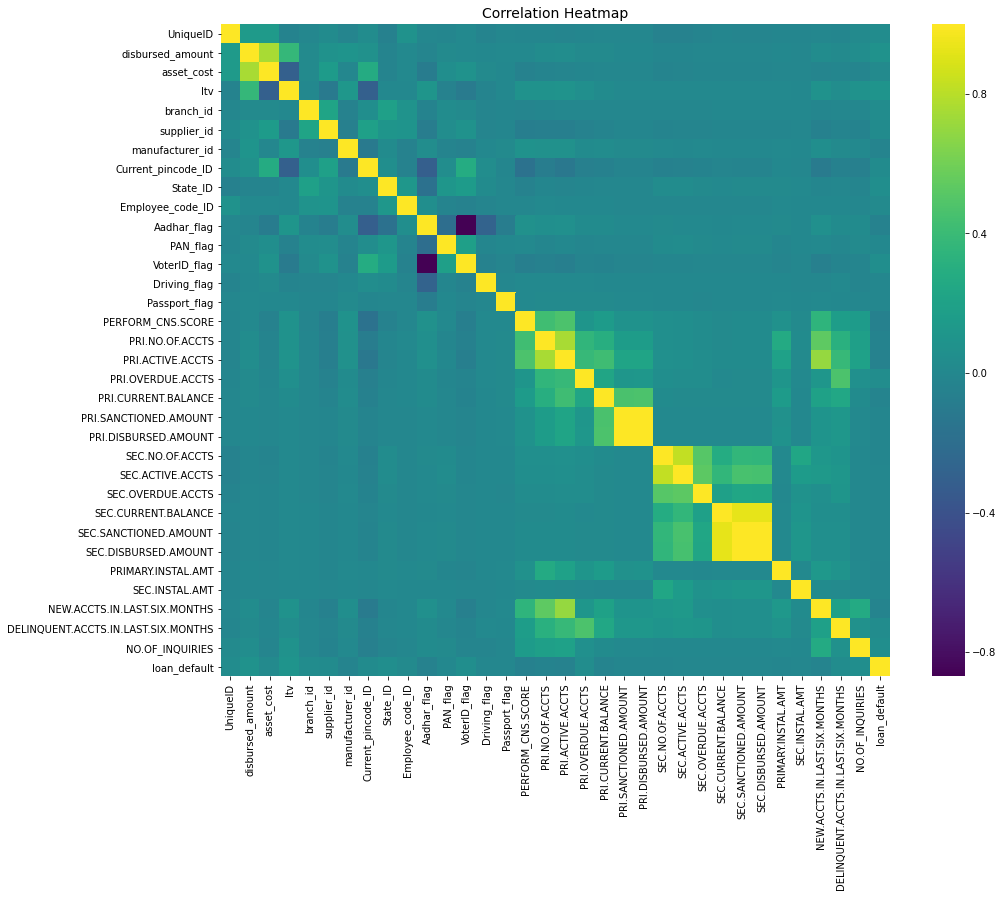

In [32]:
plt.figure(figsize=(15,12))
sns.heatmap(train_original.corr(),cmap='viridis')
plt.title('Correlation Heatmap',fontsize=14)
plt.savefig('Correlation Heatmap', bbox_inches='tight')

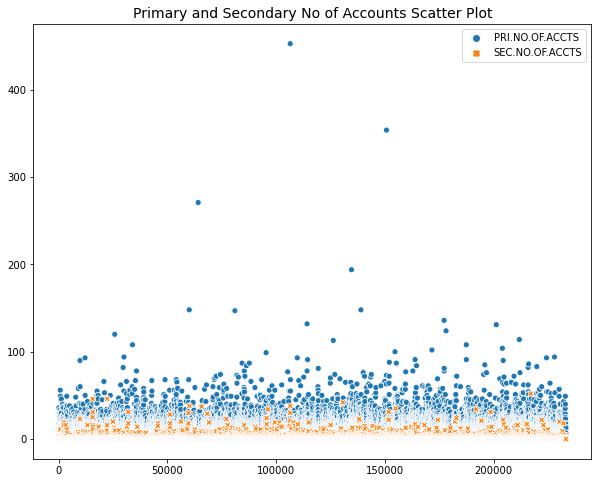

In [33]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=train_original[['PRI.NO.OF.ACCTS','SEC.NO.OF.ACCTS']])
plt.title('Primary and Secondary No of Accounts Scatter Plot',fontsize=14)
plt.savefig('Primary and Secondary No of Accounts Scatter Plot')

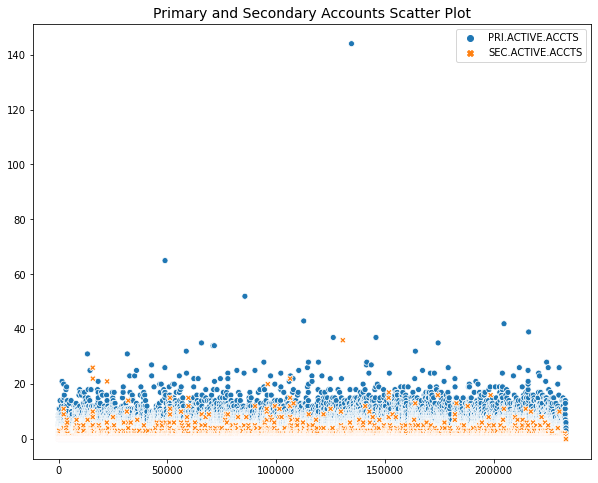

In [34]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=train_original[['PRI.ACTIVE.ACCTS','SEC.ACTIVE.ACCTS']])
plt.title('Primary and Secondary Accounts Scatter Plot',fontsize=14)
plt.savefig('Primary and Secondary Accounts Scatter Plot')

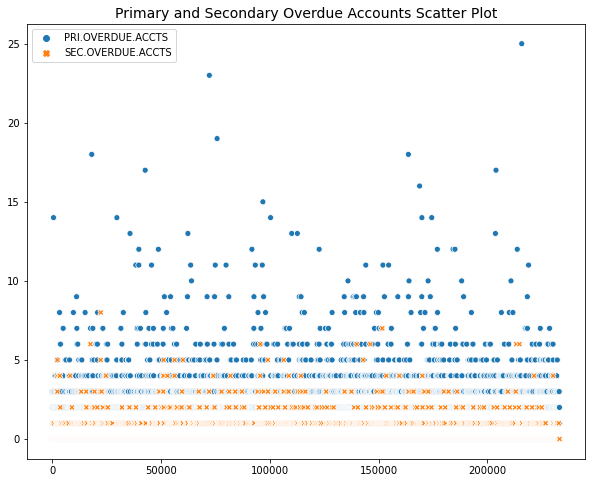

In [35]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=train_original[['PRI.OVERDUE.ACCTS','SEC.OVERDUE.ACCTS']])
plt.title('Primary and Secondary Overdue Accounts Scatter Plot',fontsize=14)
plt.savefig('Primary and Secondary Overdue Accounts Scatter Plot')

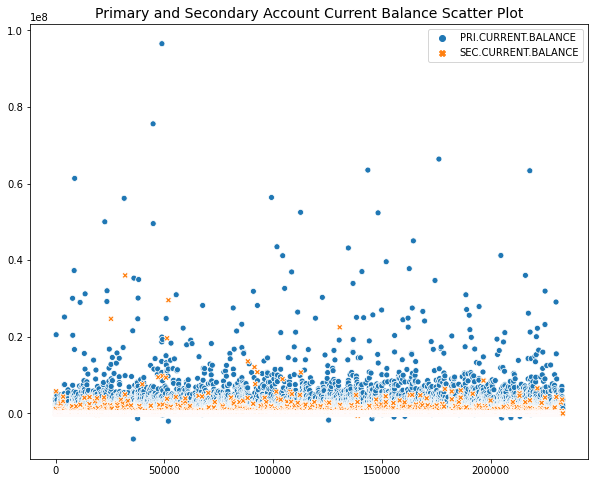

In [36]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=train_original[['PRI.CURRENT.BALANCE','SEC.CURRENT.BALANCE']])
plt.title('Primary and Secondary Account Current Balance Scatter Plot',fontsize=14)
plt.savefig('Primary and Secondary Account Current Balance Scatter Plot')

There are some outliers which can be fixed by mode imputation but I am choosing to ignore this because not using these columns in selected features

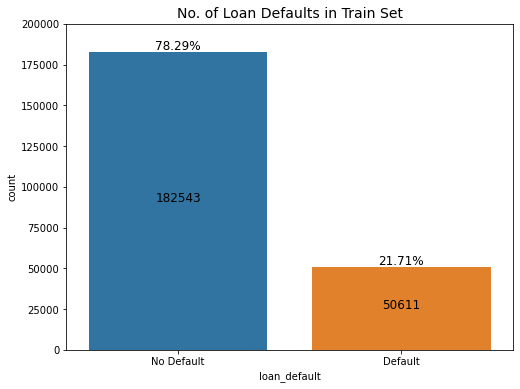

In [119]:
plt.figure(figsize=(8,6))
plt.title("No. of Loan Defaults in Train Set",fontsize=14)
ax = sns.countplot(x=train_original['loan_default'])
ax.set_xticklabels(['No Default','Default'])
plt.ylim(0,200000)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+1500,
            '{:1.2f}%'.format(height*100/len(train_original['loan_default'])),
            ha="center",size=12) 
    ax.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.0f}'.format(height),
            ha="center",size=12)
plt.savefig('No of Loan Defaults in Train Set')

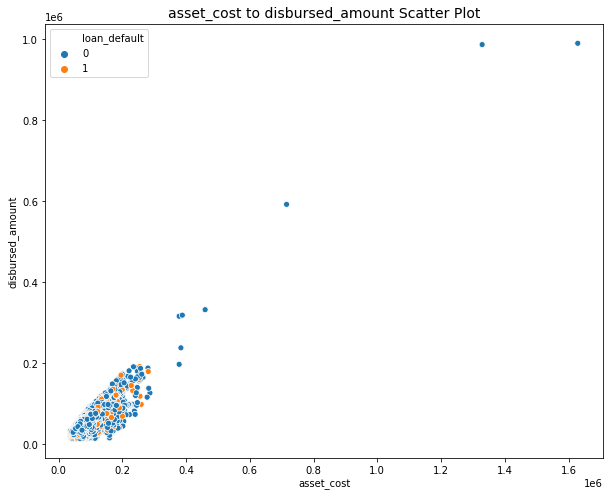

In [38]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=train_original,x='asset_cost',y='disbursed_amount',hue='loan_default')
plt.title('asset_cost to disbursed_amount Scatter Plot',fontsize=14)
plt.savefig('asset_cost to disbursed_amount Scatter Plot')

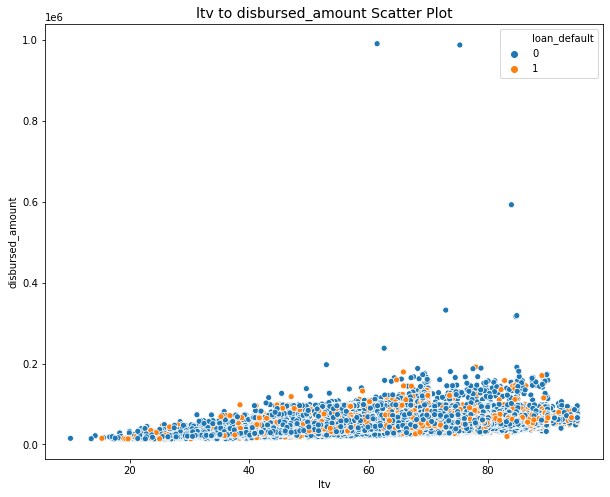

In [39]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=train_original,x='ltv',y='disbursed_amount',hue='loan_default')
plt.title('ltv to disbursed_amount Scatter Plot',fontsize=14)
plt.savefig('ltv to disbursed_amount Scatter Plot')

## Feature Selection

In [59]:
# Getting predictor and target variables
train_clean_X = train_clean.drop('loan_default',axis=1)
train_clean_y = train_clean['loan_default']

In [41]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_scaled_X = scaler.fit_transform(train_clean_X)
test_scaled = scaler.transform(test_clean)

In [42]:
# Getting top 15 features using ExtraTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(train_scaled_X,train_clean_y)

ExtraTreesClassifier()

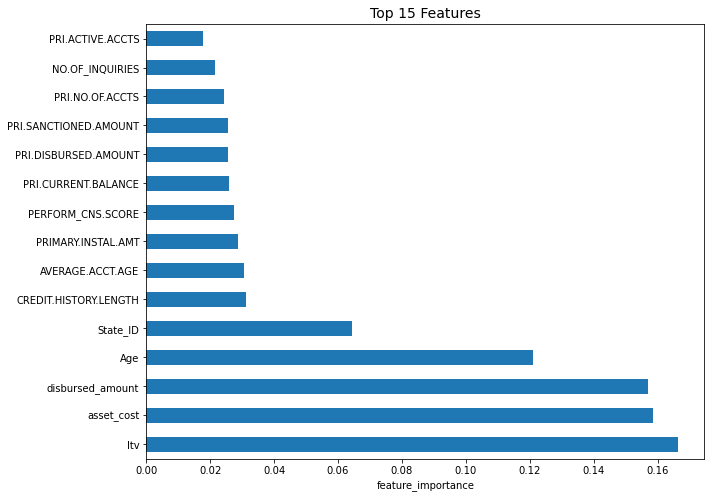

In [60]:
# Plotting a graph of feature importances
plt.figure(figsize=(10,8))
plt.title('Top 15 Features',fontsize=14)
feature_importance = pd.Series(etc.feature_importances_,index=train_clean_X.columns)
feature_importance.nlargest(15).plot(kind='barh')
plt.xlabel("feature_importance")
plt.savefig('Top 15 Features', bbox_inches='tight')
plt.show()

We will use these 15 features for training and evaluation of the models.

In [44]:
use_features = feature_importance.nlargest(15).index.tolist()

In [45]:
# Selecting important features and scaling data again
train_clean_X = train_clean_X[use_features]
test_clean = test_clean[use_features]
train_scaled_X = scaler.fit_transform(train_clean_X)
test_scaled = scaler.transform(test_clean)

## Model Comparison

In [46]:
# Importing models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score,KFold

In [47]:
models = [LogisticRegression(),GaussianNB(),DecisionTreeClassifier(),RandomForestClassifier(),
          AdaBoostClassifier(),XGBClassifier()]
model_cross_val = {}
for model in models:
    accuracies = cross_val_score(model,train_scaled_X,train_clean_y,cv=KFold(n_splits=10),n_jobs=-1,verbose=10)
    model_cross_val[str(model)[:-2]] = accuracies

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    4.0s remaining:    9.4s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    4.1s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    4.3s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.3s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    7.2s remaining:   16.9s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    7.2s r

In [48]:
# Making data frame of accuracies
model_cross_val_df = pd.DataFrame(model_cross_val)
model_cross_val_df.head()

,LogisticRegression,GaussianNB,DecisionTreeClassifier,RandomForestClassifier,AdaBoostClassifier,XGBClassifier
0,0.806313,0.800909,0.679405,0.796921,0.806399,0.806270
1,0.790830,0.784654,0.675159,0.783668,0.790359,0.791088
2,0.794476,0.788815,0.673700,0.782939,0.794219,0.794605
3,0.795205,0.501973,0.674044,0.785212,0.795291,0.795505
4,0.783187,0.778211,0.669783,0.774137,0.783187,0.783273


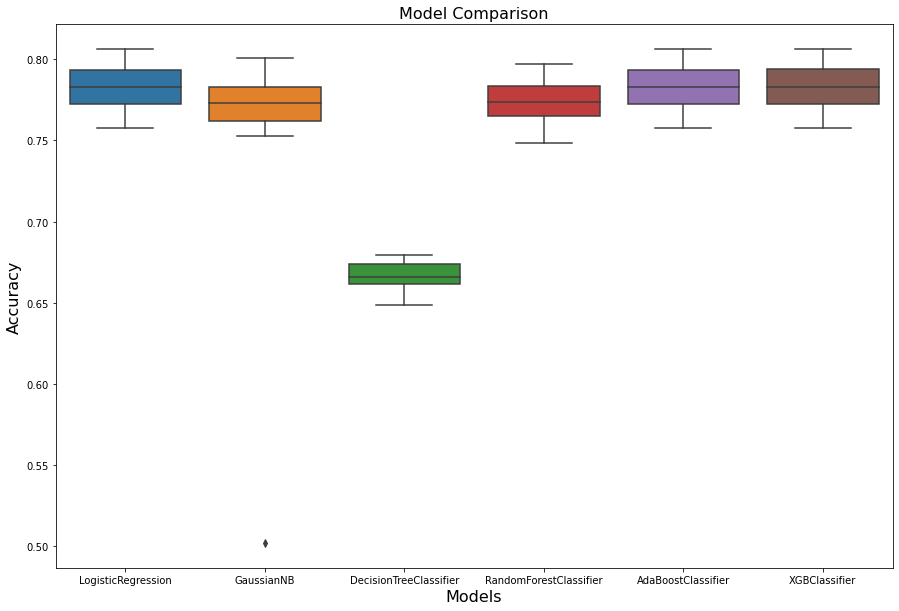

In [49]:
# Making Box Plot of Accuracy
plt.figure(figsize=(15,10))
sns.boxplot(data=model_cross_val_df)
plt.title("Model Comparison",fontsize=16)
plt.xlabel("Models",fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
plt.savefig('Model Comparison')

In [50]:
# Mean of accuracies
model_cross_val_df.mean()

LogisticRegression        0.782744
GaussianNB                0.747815
DecisionTreeClassifier    0.666259
RandomForestClassifier    0.773746
AdaBoostClassifier        0.782774
XGBClassifier             0.782937
dtype: float64

In [51]:
# Splitting the training set into two sets for evaluating the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_scaled_X, train_clean_y, test_size=0.33, random_state=1)

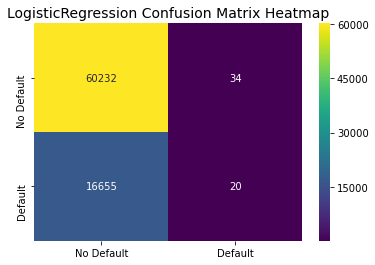

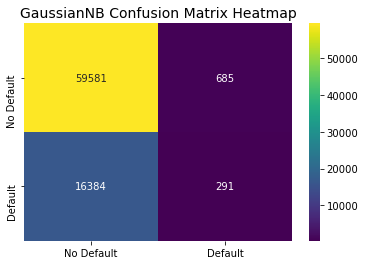

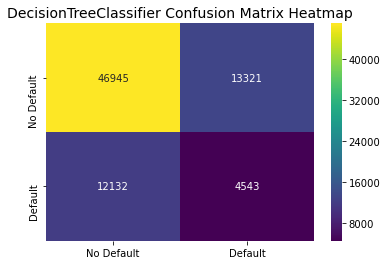

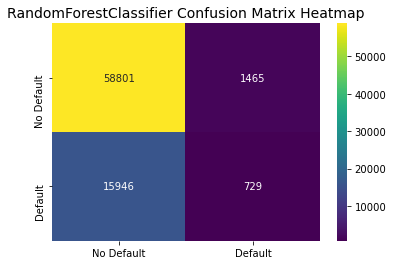

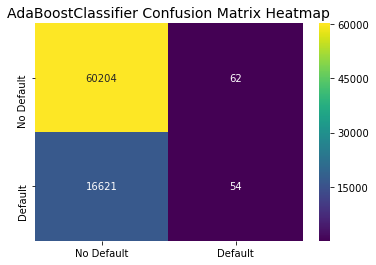

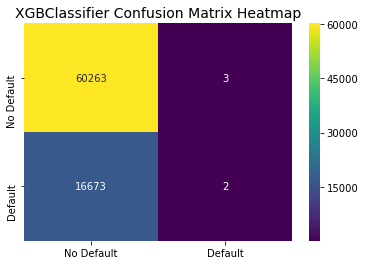

In [123]:
# Plotting confusion matrices for different models
from sklearn.metrics import confusion_matrix
for model in models:
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    plt.title(str(model)[:-2]+" Confusion Matrix Heatmap",fontsize=14)
    ax=sns.heatmap(confusion_matrix(y_test,pred),annot=True,cmap='viridis',fmt='d')
    ax.set_xticklabels(['No Default','Default'])
    ax.set_yticklabels(['No Default','Default'])
    plt.savefig(str(model)[:-2]+" Confusion Matrix Heatmap")
    plt.show()

Here we can see AdaBoostClassifier, XGBClassifier and LogisticRegression performed nearly same and have high accuracy but failed in predicting the 1s (Loan not paid), also the ratio of FN and FP for these models are very large. On the other hand DecisionTreeClassifier has relatively less accuracy but the model is balanced i.e., it is predicting 1s also (FN and FP are nearly equal). Therefore choosing DecisionTreeClassifier as our final model because other models will misclassify more.

## Model Evaluation

In [53]:
# Instantiating the model and training it
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [54]:
# Making predictions
pred = dtc.predict(X_test)

In [55]:
# Model Evaluation
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print("Classification Report: \n",classification_report(y_test,pred))
print("\nConfusion Matrix:\n",confusion_matrix(y_test,pred))
print("\nAccuracy Score:",accuracy_score(y_test,pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.78      0.79     60266
           1       0.25      0.27      0.26     16675

    accuracy                           0.67     76941
   macro avg       0.52      0.53      0.52     76941
weighted avg       0.68      0.67      0.67     76941


Confusion Matrix:
 [[46931 13335]
 [12136  4539]]

Accuracy Score: 0.668954133686851


### Conclusion
The accuracy of the model is 67% which is acceptable, and unlike other models DecisionTreeClassifier predicts both the classes to great extent. To increase the accuracy further pruning and tuning can be done, however the model is still reliable.

<i>I am not doing the Decision Tree Pruning and Hyperparameter Tuning because the dataset is very large and taking a lot of time in my system.</i>

## Final Predictions

In [56]:
# Making predictions for the test data
pred_final = dtc.predict(test_scaled)
pred_final

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

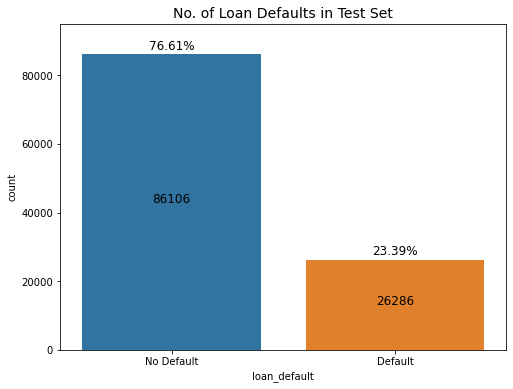

In [118]:
# Count plot of the final predictions
plt.figure(figsize=(8,6))
plt.title("No. of Loan Defaults in Test Set",fontsize=14)
plt.xlabel("loan_default")
plt.ylim(0,95000)
ax=sns.countplot(pred_final)
ax.set_xticklabels(['No Default','Default'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+1500,
            '{:1.2f}%'.format(height*100/len(pred_final)),
            ha="center",size=12) 
    ax.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.0f}'.format(height),
            ha="center",size=12)
plt.savefig("No of Loan Defaults in Test Set")